#Loading the Retrosplenial Data

In [1]:
# -*- coding: utf-8 -*-
"""
This Colab script loads the processed 'COSMOSdata.npz' file from Google Drive,
which contains several NumPy arrays. It then loads each array into a separate
variable and prints a summary of the loaded data.
"""

# Import necessary libraries
import numpy as np
# from google.colab import drive

def load_processed_data(file_path):
    """
    Loads data from a .npz file and prints a summary.

    Args:
        file_path (str): The path to the input .npz file.
    """
    try:
        # Load the .npz file.
        # np.load() returns a lazy-loader object that acts like a dictionary.
        print(f"Loading data from: {file_path}")
        data = np.load(file_path)

        print("\n--- Loading variables into memory ---")
        # You can access each array like a dictionary key
        timestamps = data['timestamps']
        calcium_signal = data['calcium_signal']
        coordinates = data['coordinates']
        head_orientation = data['head_orientation']
        dirbin = data['dirbin']
        ttype = data['ttype']
        start = data['start']
        dirvec = data['dirvec']
        posvec = data['posvec']

        print("All arrays loaded successfully.")

        # Print the shape of each loaded array to verify
        print("\n--- Summary of Loaded Variables ---")
        print(f"timestamps: {timestamps.shape}")
        print(f"calcium_signal: {calcium_signal.shape}")
        print(f"coordinates: {coordinates.shape}")
        print(f"head_orientation: {head_orientation.shape}")
        print(f"dirbin: {dirbin.shape}")
        print(f"ttype: {ttype.shape}")
        print(f"start: {start.shape}")
        print(f"dirvec: {dirvec.shape}")
        print(f"posvec: {posvec.shape}")

        # You can now use these variables for analysis.
        # For example, print the first 5 timestamps:
        print("\nExample usage - first 5 timestamps:")
        print(timestamps[:5])


    except FileNotFoundError:
        print(f"Error: The file was not found at {file_path}")
        print("Please ensure the file path is correct and the file exists in your Drive.")
    except KeyError as e:
        print(f"Error: A required array was not found in the .npz file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# --- Main Execution ---

# 1. Mount Google Drive
# This will prompt you for authorization if not already mounted.
# drive.mount('/content/drive')

# 2. Define file path
# This should be the same path where the previous script saved the file.
input_file = '../data/place_cells/COSMOSdata.npz'

# 3. Run the loading function
load_processed_data(input_file)

Loading data from: ../data/place_cells/COSMOSdata.npz

--- Loading variables into memory ---
All arrays loaded successfully.

--- Summary of Loaded Variables ---
timestamps: (1, 18200)
calcium_signal: (18200, 881)
coordinates: (18200, 2)
head_orientation: (1, 18200)
dirbin: (18200,)
ttype: (1, 18200)
start: (18200,)
dirvec: (18200, 8)
posvec: (18200, 4)

Example usage - first 5 timestamps:
[[2.53333333e+01 1.26666667e+02 2.27833333e+02 ... 1.85652908e+06
  1.85663033e+06 1.85673167e+06]]


In [4]:
import numpy as np
# from google.colab import drive

# --- 1. Mount Google Drive ---
# This allows your Colab notebook to access files stored in your Google Drive.
# You will be prompted to authorize this access.
print("Mounting Google Drive...")
# drive.mount('/content/drive')
print("Drive mounted successfully.")

# --- 2. Define File Path ---
# The path to your MODIFIED .npy file within Google Drive.
source_path = '../data/place_cells/placedata_formatted.npy'

# --- 3. Load and Process Data ---
print(f"\nAttempting to load data from: {source_path}")

try:
    # Load the .npy file.
    # allow_pickle=True is necessary for loading object arrays, like dictionaries.
    # .item() is used to extract the dictionary object that was saved into the file.
    loaded_data = np.load(source_path, allow_pickle=True).item()
    print("File loaded successfully.")

    # --- 4. Extract Variables from the Dictionary ---
    # We extract each variable by using its name as a key in the loaded dictionary.
    # Note that we are now using 'RLtesttgt' as the key.
    LRtrain = loaded_data['LRtrain']
    LRtest = loaded_data['LRtest']
    RLtest = loaded_data['RLtest']
    LRtraintgt = loaded_data['LRtraintgt']
    LRtesttgt = loaded_data['LRtesttgt']
    RLtesttgt = loaded_data['RLtesttgt'] # <-- Using the new, renamed variable

    print("\nSuccessfully extracted all variables. Shapes:")
    print(f"  LRtrain:    {LRtrain.shape}")
    print(f"  LRtest:     {LRtest.shape}")
    print(f"  RLtest:     {RLtest.shape}")
    print(f"  LRtraintgt: {LRtraintgt.shape}")
    print(f"  LRtesttgt:  {LRtesttgt.shape}")
    print(f"  RLtesttgt:  {RLtesttgt.shape}") # <-- Updated variable name

    # --- 5. Find and Print Unique Labels ---
    # The np.unique() function returns the sorted unique elements of an array.
    print("\n" + "="*40)
    print("Analyzing unique labels in target vectors...")
    print("="*40)

    unique_train_labels = np.unique(LRtraintgt)
    print(f"Unique labels in LRtraintgt: {unique_train_labels}")

    unique_test_lr_labels = np.unique(LRtesttgt)
    print(f"Unique labels in LRtesttgt:  {unique_test_lr_labels}")

    unique_test_rl_labels = np.unique(RLtesttgt) # <-- Using the new, renamed variable
    print(f"Unique labels in RLtesttgt:   {unique_test_rl_labels}") # <-- Updated label
    print("="*40)


# --- Error Handling ---
except FileNotFoundError:
    print(f"\n[ERROR] File Not Found: The file could not be found at '{source_path}'.")
    print("Please ensure that 'placedata_modified.npy' exists in the root of your 'My Drive'.")

except KeyError as e:
    print(f"\n[ERROR] Missing Data: The file was loaded, but a required variable key was not found: {e}.")
    print("Please check the script that created 'placedata_modified.npy' to ensure all 6 variables were saved correctly with the new names.")

except Exception as e:
    print(f"\n[ERROR] An unexpected error occurred: {e}")

Mounting Google Drive...
Drive mounted successfully.

Attempting to load data from: ../data/place_cells/placedata_formatted.npy
File loaded successfully.

Successfully extracted all variables. Shapes:
  LRtrain:    (359, 916)
  LRtest:     (359, 904)
  RLtest:     (359, 1003)
  LRtraintgt: (916,)
  LRtesttgt:  (904,)
  RLtesttgt:  (1003,)

Analyzing unique labels in target vectors...
Unique labels in LRtraintgt: [0.         0.04545455 0.09090909 0.13636364 0.18181818 0.22727273
 0.27272727 0.31818182 0.36363636 0.40909091 0.45454545 0.5
 0.54545455 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727
 0.81818182 0.86363636 0.90909091 0.95454545 1.        ]
Unique labels in LRtesttgt:  [0.         0.04545455 0.09090909 0.13636364 0.18181818 0.22727273
 0.27272727 0.31818182 0.36363636 0.40909091 0.45454545 0.5
 0.54545455 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727
 0.81818182 0.86363636 0.90909091 0.95454545 1.        ]
Unique labels in RLtesttgt:   [0.         0.04545455 

# Predictor Model

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# 2. Define a simple linear regression model class
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# 3. Instantiate the model, define loss and optimizer
input_dimension = LRtrain.shape[0] # The input dimension is the number of rows in LRtrain
model = RegressionModel(input_dimension)
criterion = nn.MSELoss() # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam optimizer

# 4. Convert data to PyTorch tensors
# Transpose LRtrain so that the features are columns and samples are rows
LRtrain_tensor = torch.tensor(LRtrain.T, dtype=torch.float32)
LRtraintgt_tensor = torch.tensor(LRtraintgt, dtype=torch.float32).reshape(-1, 1) # Reshape target to (n_samples, 1)

# 5. Implement a training loop
num_epochs = 1000 # Define the number of training epochs

print("Starting training...")
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(LRtrain_tensor)
    loss = criterion(outputs, LRtraintgt_tensor)

    # Backward and optimize
    optimizer.zero_grad() # Clear previous gradients
    loss.backward()       # Compute gradients
    optimizer.step()      # Update weights

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training finished.")

# 6. Evaluate the model on training data
with torch.no_grad(): # No need to track gradients during evaluation
    train_predictions = model(LRtrain_tensor)
    train_loss = criterion(train_predictions, LRtraintgt_tensor)
    print(f'\nTraining Loss after training: {train_loss.item():.4f}')


Starting training...
Epoch [100/1000], Loss: 0.0033
Epoch [200/1000], Loss: 0.0017
Epoch [300/1000], Loss: 0.0012
Epoch [400/1000], Loss: 0.0009
Epoch [500/1000], Loss: 0.0007
Epoch [600/1000], Loss: 0.0006
Epoch [700/1000], Loss: 0.0005
Epoch [800/1000], Loss: 0.0004
Epoch [900/1000], Loss: 0.0004
Epoch [1000/1000], Loss: 0.0004
Training finished.

Training Loss after training: 0.0003


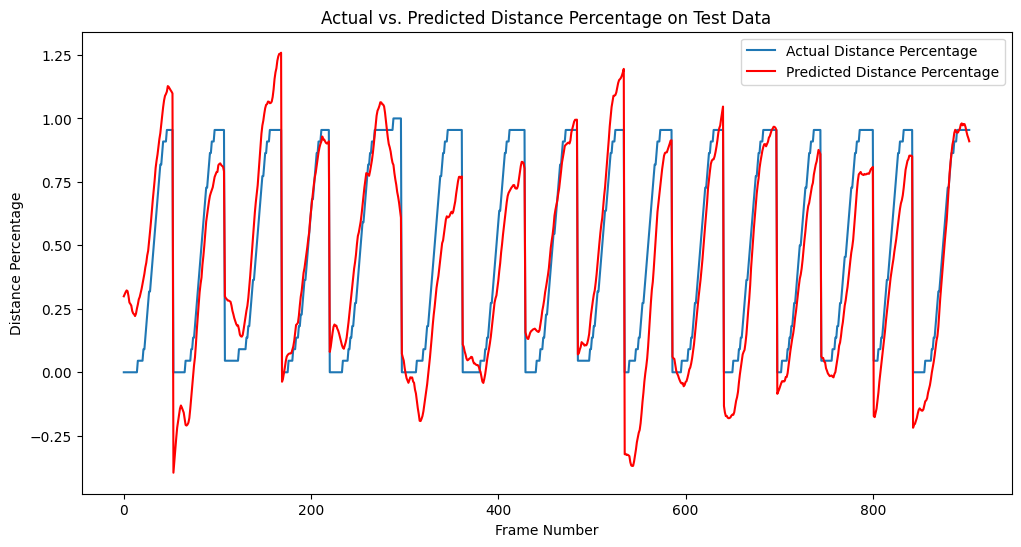


Mean Squared Error on Test Data: 0.0281


In [6]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn # Import nn for MSELoss

# 1. Convert LRtest and LRtesttgt to PyTorch tensors
# Transpose LRtest similar to how LRtrain was handled
LRtest_tensor = torch.tensor(LRtest.T, dtype=torch.float32)
LRtesttgt_tensor = torch.tensor(LRtesttgt, dtype=torch.float32).reshape(-1, 1)

# 2. Set the model to evaluation mode
model.eval()

# 3. Use a torch.no_grad() context to perform predictions
with torch.no_grad():
    test_predictions_tensor = model(LRtest_tensor)

# 4. Convert predicted tensors and LRtesttgt tensor back to NumPy arrays
test_predictions = test_predictions_tensor.numpy()
actual_values = LRtesttgt_tensor.numpy()

# 5. Create a plot with frame number on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual Distance Percentage')
plt.plot(test_predictions, label='Predicted Distance Percentage', color='red') # Added color='red'

# 6. Add appropriate labels
plt.xlabel("Frame Number")
plt.ylabel("Distance Percentage")

# 7. Add a title to the plot
plt.title("Actual vs. Predicted Distance Percentage on Test Data")

# 8. Add a legend
plt.legend()

# 9. Display the plot
plt.show()

# 10. Calculate and display Mean Squared Error
mse_criterion = nn.MSELoss()
test_mse = mse_criterion(test_predictions_tensor, LRtesttgt_tensor)
print(f"\nMean Squared Error on Test Data: {test_mse.item():.4f}")
test_mse_predictor = test_mse.item()

# SLP One Hot Vector Classifier

In [7]:
# 1. Define the mapping from unique distance percentage values to integer class labels
# unique_train_labels was already printed in the first code cell.
# We can use it directly or re-calculate it from LRtraintgt if needed.
# Let's re-calculate from LRtraintgt for robustness.
unique_labels = np.unique(LRtraintgt)
label_to_int = {label: i for i, label in enumerate(unique_labels)}
num_classes = len(unique_labels)

# 2. Create a reverse mapping from integer class labels back to unique distance percentage values
int_to_label = {i: label for label, i in label_to_int.items()}
# Alternatively, if unique_labels is sorted (which np.unique does), we can use a list:
# int_to_label_list = unique_labels.tolist()


# 3. Convert LRtraintgt to integer labels and then to one-hot encoded tensor
LRtraintgt_int = np.array([label_to_int[label] for label in LRtraintgt])
LRtraintgt_onehot = torch.eye(num_classes)[LRtraintgt_int]

# 4. Convert LRtesttgt to integer labels and then to one-hot encoded tensor
LRtesttgt_int = np.array([label_to_int[label] for label in LRtesttgt])
LRtesttgt_onehot = torch.eye(num_classes)[LRtesttgt_int]

print(f"Number of unique classes: {num_classes}")
print(f"Shape of LRtraintgt_onehot: {LRtraintgt_onehot.shape}")
print(f"Shape of LRtesttgt_onehot: {LRtesttgt_onehot.shape}")

# 2. Define a classification model class
class ClassifierModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ClassifierModel, self).__init__()
        # Define a linear layer that maps input_dim features to num_classes outputs
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        # Pass the input through the linear layer.
        # CrossEntropyLoss expects raw logits, so no activation is applied here.
        return self.linear(x)

# 3. Instantiate the model
# The input dimension is the number of rows in the feature data (LRtrain),
# and the output dimension is the number of unique classes.
input_dimension = LRtrain.shape[0] # Should be 359
# num_classes was determined in the previous step
model = ClassifierModel(input_dimension, num_classes)

# 4. Define the loss function
# CrossEntropyLoss is suitable for multi-class classification and
# combines LogSoftmax and NLLLoss internally.
criterion = nn.CrossEntropyLoss()

# 5. Define an optimizer
# Adam optimizer is a common choice for many deep learning tasks.
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Classifier model defined.")
print(f"Input dimension: {input_dimension}")
print(f"Number of classes: {num_classes}")
print("Criterion: CrossEntropyLoss")
print("Optimizer: Adam")

# 1. Convert LRtrain to a PyTorch tensor
# Transpose LRtrain so that the features are columns and samples are rows
LRtrain_tensor = torch.tensor(LRtrain.T, dtype=torch.float32)

# 2. LRtraintgt_onehot is already a PyTorch tensor from the previous step

# 3. Define the number of training epochs
num_epochs = 1000 # Define the number of training epochs

# 4. Implement a training loop
print("Starting training...")
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(LRtrain_tensor)
    loss = criterion(outputs, LRtraintgt_onehot)

    # Backward and optimize
    optimizer.zero_grad() # Clear previous gradients
    loss.backward()       # Compute gradients
    optimizer.step()      # Update weights

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training finished.")

# 1. Convert LRtest to a PyTorch tensor
# Transpose LRtest so that the features are columns and samples are rows
LRtest_tensor = torch.tensor(LRtest.T, dtype=torch.float32)

# 2. Set the model to evaluation mode
model.eval()

# 3. Use a torch.no_grad() context to perform predictions
with torch.no_grad():
    test_outputs = model(LRtest_tensor)

# 4. Get the predicted class labels by finding the index of the maximum value
# The model outputs logits for each class. We take the argmax to get the predicted class index.
predicted_labels = torch.argmax(test_outputs, dim=1)

# 5. Get the actual class labels from LRtesttgt_onehot
# Since LRtesttgt_onehot is one-hot encoded, we need to get the index of the '1' in each row
actual_labels = torch.argmax(LRtesttgt_onehot, dim=1)

# 6. Calculate the accuracy
# Compare predicted labels with actual labels and calculate the percentage of correct predictions
correct_predictions = (predicted_labels == actual_labels).sum().item()
total_samples = actual_labels.size(0)
accuracy = correct_predictions / total_samples

# 7. Print the calculated accuracy on the test data
print(f"Accuracy on test data: {accuracy:.4f}")

Number of unique classes: 23
Shape of LRtraintgt_onehot: torch.Size([916, 23])
Shape of LRtesttgt_onehot: torch.Size([904, 23])
Classifier model defined.
Input dimension: 359
Number of classes: 23
Criterion: CrossEntropyLoss
Optimizer: Adam
Starting training...
Epoch [100/1000], Loss: 1.5526
Epoch [200/1000], Loss: 1.1999
Epoch [300/1000], Loss: 1.0289
Epoch [400/1000], Loss: 0.9215
Epoch [500/1000], Loss: 0.8449
Epoch [600/1000], Loss: 0.7861
Epoch [700/1000], Loss: 0.7388
Epoch [800/1000], Loss: 0.6993
Epoch [900/1000], Loss: 0.6656
Epoch [1000/1000], Loss: 0.6361
Training finished.
Accuracy on test data: 0.5254


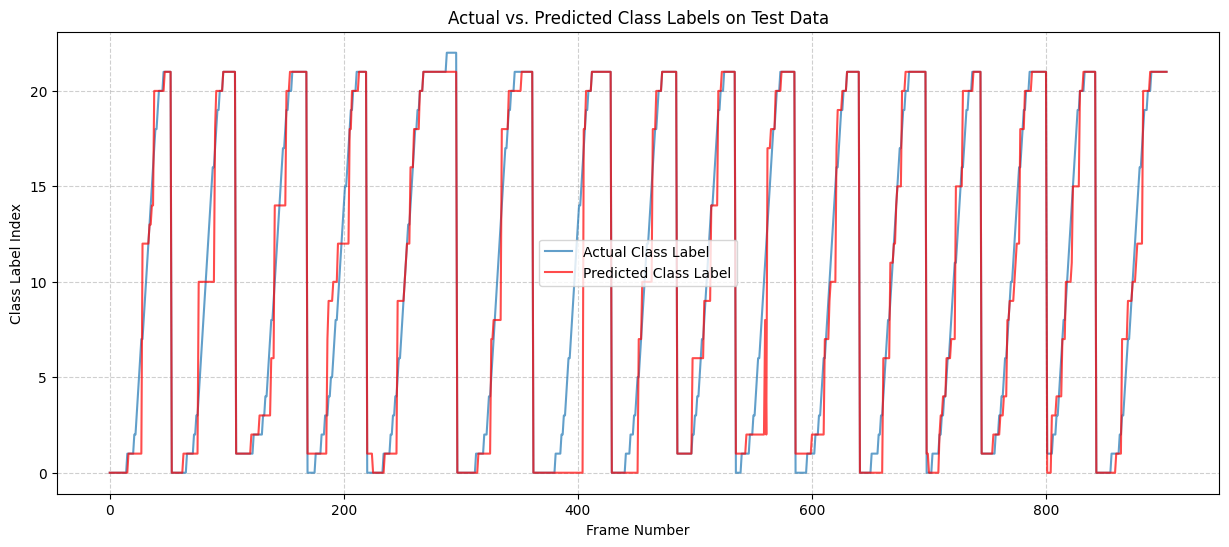

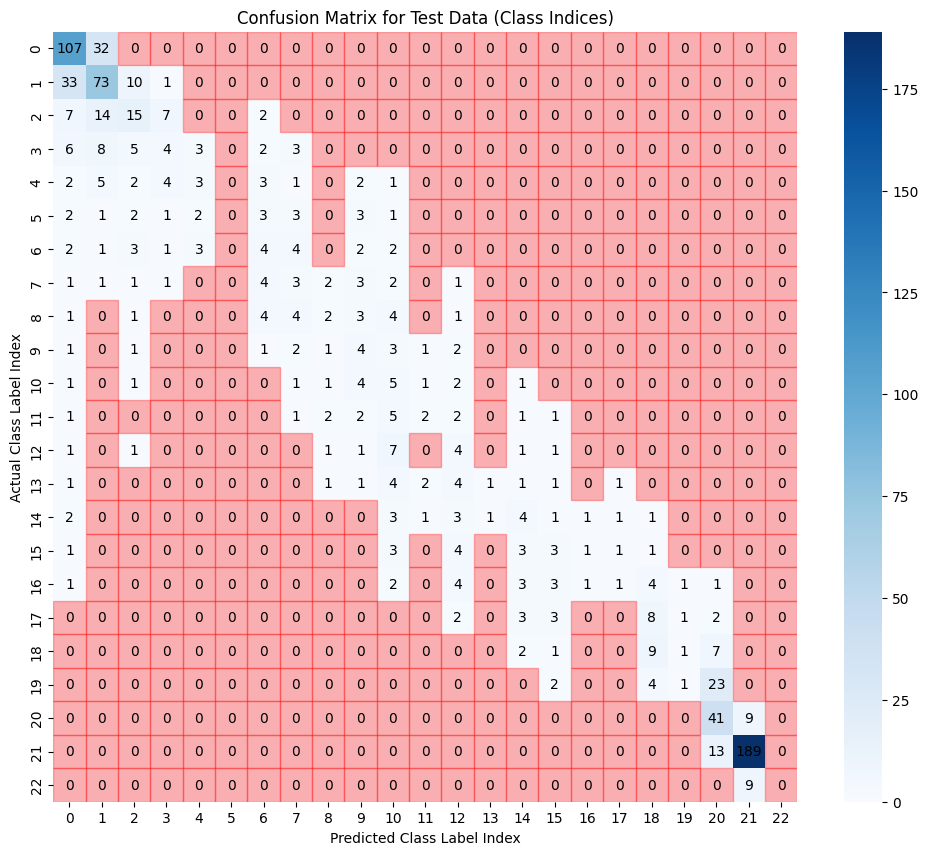


Mean Squared Error on Test Data (using distance percentages): 0.0091


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch.nn as nn # Import nn for MSELoss
import numpy as np # Import numpy


# 1. Convert predicted_labels and actual_labels tensors back to NumPy arrays
predicted_labels_np = predicted_labels.numpy()
actual_labels_np = actual_labels.numpy()

# 2. Create a plot to visualize the actual vs. predicted labels
plt.figure(figsize=(15, 6))
plt.plot(actual_labels_np, label='Actual Class Label', alpha=0.7)
plt.plot(predicted_labels_np, label='Predicted Class Label', alpha=0.7, color='red') # Changed color to red
plt.xlabel("Frame Number")
plt.ylabel("Class Label Index")
plt.title("Actual vs. Predicted Class Labels on Test Data")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Calculate Mean Squared Error
# Convert class indices back to original distance percentage values for MSE calculation
predicted_distance_values = np.array([int_to_label[idx] for idx in predicted_labels_np])
actual_distance_values = np.array([int_to_label[idx] for idx in actual_labels_np])

predicted_distance_tensor = torch.tensor(predicted_distance_values, dtype=torch.float32)
actual_distance_tensor = torch.tensor(actual_distance_values, dtype=torch.float32)

mse_criterion = nn.MSELoss()
test_mse = mse_criterion(predicted_distance_tensor, actual_distance_tensor)


# 3. Compute the confusion matrix
cm = confusion_matrix(actual_labels_np, predicted_labels_np)

# Get a shorter representation of unique labels for tick labels
tick_labels = [f'{i}' for i in range(num_classes)] # Using index as labels

# 4. Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, # cbar=True to show color bar
            xticklabels=tick_labels, yticklabels=tick_labels,
            annot_kws={"color": "black", "weight": "normal"}) # Set annotation color to black

# Highlight cells with value 0 in red by drawing rectangles
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] == 0:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='red', alpha=0.3)) # Draw a red rectangle with some transparency


# 6. Add labels to the confusion matrix heatmap
plt.xlabel("Predicted Class Label Index") # Updated label
plt.ylabel("Actual Class Label Index")   # Updated label
plt.title("Confusion Matrix for Test Data (Class Indices)") # Updated title

# 7. Display the plot and the confusion matrix heatmap
plt.show()

# Print the calculated Mean Squared Error after the confusion matrix
print(f"\nMean Squared Error on Test Data (using distance percentages): {test_mse.item():.4f}")
test_mse_SLP_One_Hot = test_mse.item()

# SLP Ordinal Model


In [9]:
import numpy as np

# 1. Determine the unique sorted labels from LRtraintgt.
# np.unique automatically sorts the unique elements.
unique_labels = np.unique(LRtraintgt)

# 2. Create a dictionary label_to_int mapping each unique label to a corresponding integer index, preserving the order.
label_to_int = {label: i for i, label in enumerate(unique_labels)}

# 3. Create a dictionary int_to_label mapping each integer index back to its original unique label.
int_to_label = {i: label for i, label in enumerate(unique_labels)}

# 4. Convert LRtraintgt and LRtesttgt from their original float values to integer class labels using the label_to_int mapping. Store these as NumPy arrays.
LRtraintgt_int = np.array([label_to_int[label] for label in LRtraintgt])
LRtesttgt_int = np.array([label_to_int[label] for label in LRtesttgt])

# 5. Determine the total number of unique classes (num_classes).
num_classes = len(unique_labels)

print(f"Number of unique classes: {num_classes}")
print(f"Example label_to_int mapping: {list(label_to_int.items())[:5]}...")
print(f"Example int_to_label mapping: {list(int_to_label.items())[:5]}...")
print(f"Shape of LRtraintgt_int: {LRtraintgt_int.shape}")
print(f"Shape of LRtesttgt_int: {LRtesttgt_int.shape}")

import torch
import torch.nn as nn
import torch.optim as optim

# 1. Define a classification model class (Single-Layer Perceptron)
class ClassifierModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ClassifierModel, self).__init__()
        # Define a linear layer that maps input_dim features to num_classes outputs
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        # Pass the input through the linear layer.
        # CrossEntropyLoss expects raw logits, so no activation is applied here.
        return self.linear(x)

# 2. Instantiate the model
# The input dimension is the number of rows in the feature data (LRtrain),
# and the output dimension is the number of unique classes.
input_dimension = LRtrain.shape[0] # Should be 359
# num_classes was determined in the previous step
model = ClassifierModel(input_dimension, num_classes)

# 3. Define the loss function
# CrossEntropyLoss is suitable for multi-class classification and
# combines LogSoftmax and NLLLoss internally.
criterion = nn.CrossEntropyLoss()

# 4. Define an optimizer
# Adam optimizer is a common choice for many deep learning tasks.
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Classifier model defined.")
print(f"Input dimension: {input_dimension}")
print(f"Number of classes: {num_classes}")
print("Criterion: CrossEntropyLoss")
print("Optimizer: Adam")

# 5. Convert LRtrain and LRtraintgt_int to PyTorch tensors
# Transpose LRtrain so that the features are columns and samples are rows
LRtrain_tensor = torch.tensor(LRtrain.T, dtype=torch.float32)
# LRtraintgt_int is already a NumPy array of integers
LRtraintgt_tensor = torch.tensor(LRtraintgt_int, dtype=torch.long) # Use torch.long for CrossEntropyLoss target

# 6. Define the number of training epochs
num_epochs = 1000 # Define the number of training epochs

# 7. Implement a training loop
print("Starting training...")
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(LRtrain_tensor)
    loss = criterion(outputs, LRtraintgt_tensor)

    # Backward and optimize
    optimizer.zero_grad() # Clear previous gradients
    loss.backward()       # Compute gradients
    optimizer.step()      # Update weights

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training finished.")

# 8. Convert LRtest and LRtesttgt_int to PyTorch tensors
# Transpose LRtest so that the features are columns and samples are rows
LRtest_tensor = torch.tensor(LRtest.T, dtype=torch.float32)
# LRtesttgt_int is already a NumPy array of integers
LRtesttgt_tensor = torch.tensor(LRtesttgt_int, dtype=torch.long) # Use torch.long for CrossEntropyLoss target

# 9. Set the model to evaluation mode
model.eval()

# 10. Use a torch.no_grad() context to perform predictions
with torch.no_grad():
    test_outputs = model(LRtest_tensor)

# 11. Get the predicted class labels by finding the index of the maximum value
# The model outputs logits for each class. We take the argmax to get the predicted class index.
predicted_labels = torch.argmax(test_outputs, dim=1)

# 12. Get the actual class labels from LRtesttgt_int
actual_labels = LRtesttgt_tensor

# 13. Calculate the accuracy
# Compare predicted labels with actual labels and calculate the percentage of correct predictions
correct_predictions = (predicted_labels == actual_labels).sum().item()
total_samples = actual_labels.size(0)
accuracy = correct_predictions / total_samples

# 14. Print the calculated accuracy on the test data
print(f"Accuracy on test data: {accuracy:.4f}")

Number of unique classes: 23
Example label_to_int mapping: [(np.float64(0.0), 0), (np.float64(0.045454545454545456), 1), (np.float64(0.09090909090909091), 2), (np.float64(0.13636363636363635), 3), (np.float64(0.18181818181818182), 4)]...
Example int_to_label mapping: [(0, np.float64(0.0)), (1, np.float64(0.045454545454545456)), (2, np.float64(0.09090909090909091)), (3, np.float64(0.13636363636363635)), (4, np.float64(0.18181818181818182))]...
Shape of LRtraintgt_int: (916,)
Shape of LRtesttgt_int: (904,)
Classifier model defined.
Input dimension: 359
Number of classes: 23
Criterion: CrossEntropyLoss
Optimizer: Adam
Starting training...
Epoch [100/1000], Loss: 1.5485
Epoch [200/1000], Loss: 1.1994
Epoch [300/1000], Loss: 1.0296
Epoch [400/1000], Loss: 0.9226
Epoch [500/1000], Loss: 0.8463
Epoch [600/1000], Loss: 0.7877
Epoch [700/1000], Loss: 0.7404
Epoch [800/1000], Loss: 0.7010
Epoch [900/1000], Loss: 0.6673
Epoch [1000/1000], Loss: 0.6378
Training finished.
Accuracy on test data: 0.5

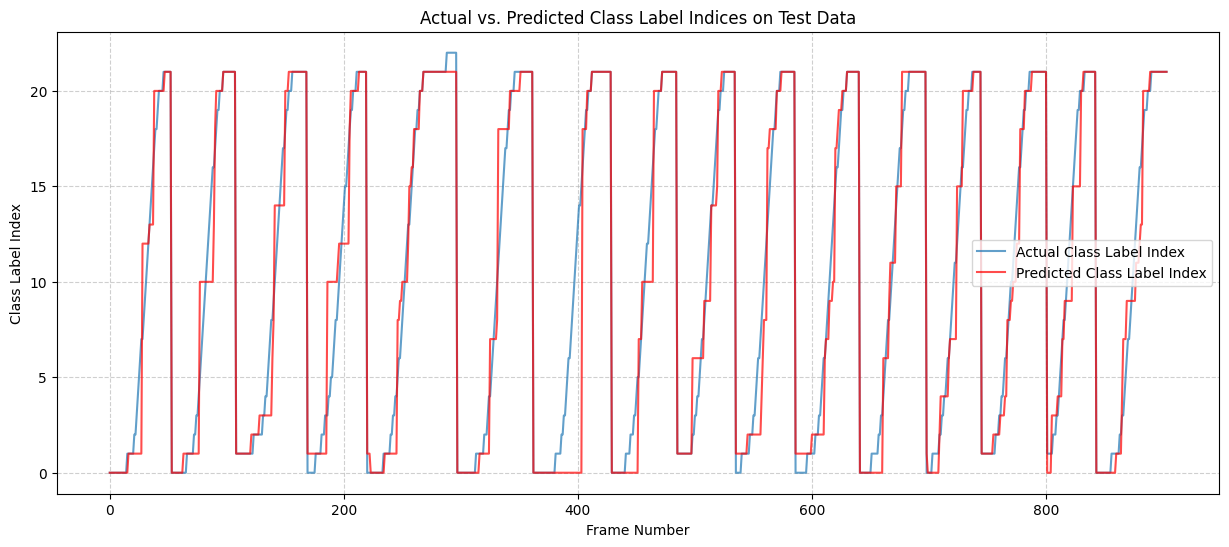

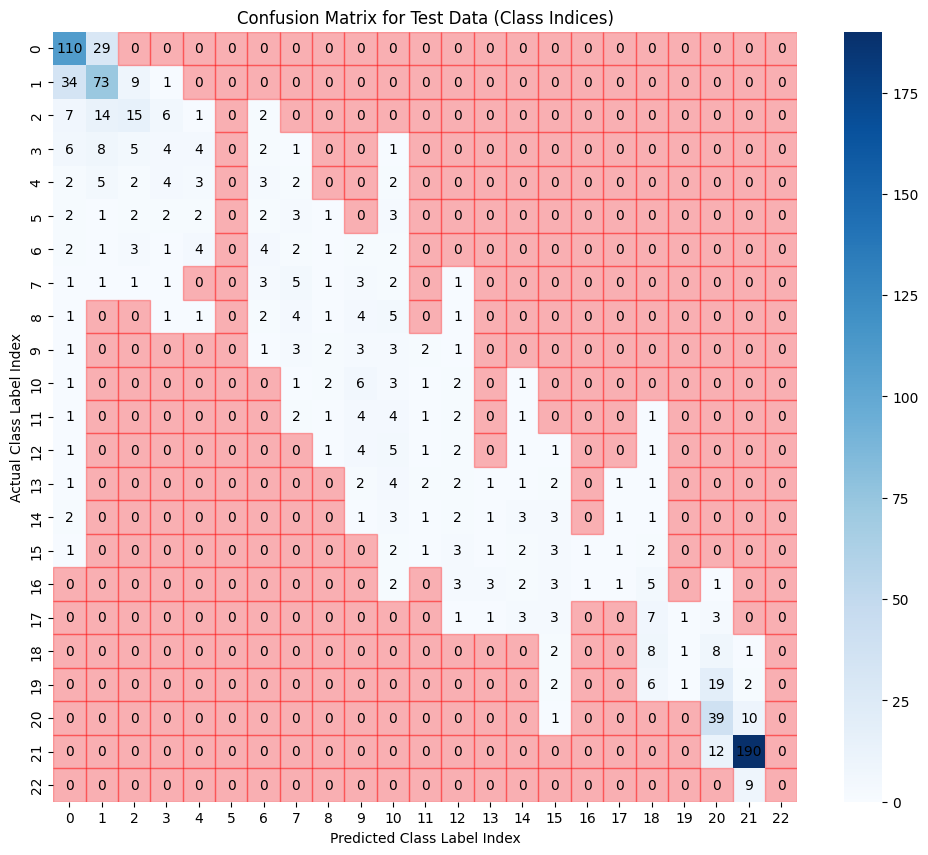


Mean Squared Error on Test Data (using distance percentages): 0.0085


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import torch # Import torch for tensor operations

# Convert predicted_labels and actual_labels tensors back to NumPy arrays for plotting and confusion matrix
predicted_labels_np = predicted_labels.numpy()
actual_labels_np = actual_labels.numpy()

# Create a plot to visualize the actual vs. predicted labels
plt.figure(figsize=(15, 6))
plt.plot(actual_labels_np, label='Actual Class Label Index', alpha=0.7)
plt.plot(predicted_labels_np, label='Predicted Class Label Index', alpha=0.7, color='red')
plt.xlabel("Frame Number")
plt.ylabel("Class Label Index")
plt.title("Actual vs. Predicted Class Label Indices on Test Data")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(actual_labels_np, predicted_labels_np)

# Get tick labels for the confusion matrix (using integer indices)
tick_labels = [f'{i}' for i in range(num_classes)]

# Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=tick_labels, yticklabels=tick_labels,
            annot_kws={"color": "black", "weight": "normal"})

# Highlight cells with value 0 in red by drawing rectangles
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] == 0:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='red', alpha=0.3))

plt.xlabel("Predicted Class Label Index")
plt.ylabel("Actual Class Label Index")
plt.title("Confusion Matrix for Test Data (Class Indices)")
plt.show()

# Calculate Mean Squared Error using original distance percentage values
# Convert predicted and actual class indices back to original distance percentage values
predicted_distance_values = np.array([int_to_label[idx] for idx in predicted_labels_np])
actual_distance_values = np.array([int_to_label[idx] for idx in actual_labels_np])

# Convert to tensors for MSE calculation
predicted_distance_tensor = torch.tensor(predicted_distance_values, dtype=torch.float32)
actual_distance_tensor = torch.tensor(actual_distance_values, dtype=torch.float32)

mse_criterion = nn.MSELoss()
test_mse = mse_criterion(predicted_distance_tensor, actual_distance_tensor)

# Print the calculated Mean Squared Error after the confusion matrix
print(f"\nMean Squared Error on Test Data (using distance percentages): {test_mse.item():.4f}")
test_mse_SLP_Ordinal = test_mse.item()

#SVM Model




In [11]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.exceptions import ConvergenceWarning
import warnings
import torch # Included as requested, though not used for core SVM logic

# 1. Prepare data for SVM classification
# Determine the unique sorted labels from LRtraintgt.
unique_labels = np.unique(LRtraintgt)

# Create a dictionary label_to_int mapping each unique label to a corresponding integer index, preserving the order.
label_to_int = {label: i for i, label in enumerate(unique_labels)}

# Create a dictionary int_to_label mapping each integer index back to its original unique label.
int_to_label = {i: label for i, label in enumerate(unique_labels)}

# Convert LRtraintgt and LRtesttgt from their original float values to integer class labels using the label_to_int mapping. Store these as NumPy arrays.
LRtraintgt_int = np.array([label_to_int[label] for label in LRtraintgt])
LRtesttgt_int = np.array([label_to_int[label] for label in LRtesttgt])

# Determine the total number of unique classes (num_classes).
num_classes = len(unique_labels)

print(f"Number of unique classes: {num_classes}")
print(f"Example label_to_int mapping: {list(label_to_int.items())[:5]}...")
print(f"Example int_to_label mapping: {list(int_to_label.items())[:5]}...")
print(f"Shape of LRtraintgt_int: {LRtraintgt_int.shape}")
print(f"Shape of LRtesttgt_int: {LRtesttgt_int.shape}")


# 2. Define and train the scikit-learn LinearSVC model
# Transpose the LRtrain array as scikit-learn expects samples as rows and features as columns
LRtrain_transposed = LRtrain.T

# Instantiate a LinearSVC object
# Increased max_iter to help with convergence if needed
# Added random_state for reproducibility
svm_model_ordinal = LinearSVC(random_state=42, max_iter=2000)

# Suppress ConvergenceWarning as it's common and can be handled by increasing max_iter
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Train the LinearSVC model
print("\nStarting LinearSVC (Ordinal Style Evaluation) training...")
svm_model_ordinal.fit(LRtrain_transposed, LRtraintgt_int)
print("LinearSVC training finished.")

# 3. Evaluate the SVM model
# Transpose the LRtest array
LRtest_transposed = LRtest.T

# Use the trained svm_model_ordinal to predict the class labels for the transposed LRtest data
predicted_labels_int_ordinal = svm_model_ordinal.predict(LRtest_transposed)

# Calculate the accuracy of the model's predictions
correct_predictions_ordinal = (predicted_labels_int_ordinal == LRtesttgt_int).sum()
total_samples_ordinal = LRtesttgt_int.shape[0]
accuracy_ordinal = correct_predictions_ordinal / total_samples_ordinal

print(f"Accuracy on test data: {accuracy_ordinal:.4f}")

Number of unique classes: 23
Example label_to_int mapping: [(np.float64(0.0), 0), (np.float64(0.045454545454545456), 1), (np.float64(0.09090909090909091), 2), (np.float64(0.13636363636363635), 3), (np.float64(0.18181818181818182), 4)]...
Example int_to_label mapping: [(0, np.float64(0.0)), (1, np.float64(0.045454545454545456)), (2, np.float64(0.09090909090909091)), (3, np.float64(0.13636363636363635)), (4, np.float64(0.18181818181818182))]...
Shape of LRtraintgt_int: (916,)
Shape of LRtesttgt_int: (904,)

Starting LinearSVC (Ordinal Style Evaluation) training...
LinearSVC training finished.
Accuracy on test data: 0.5033


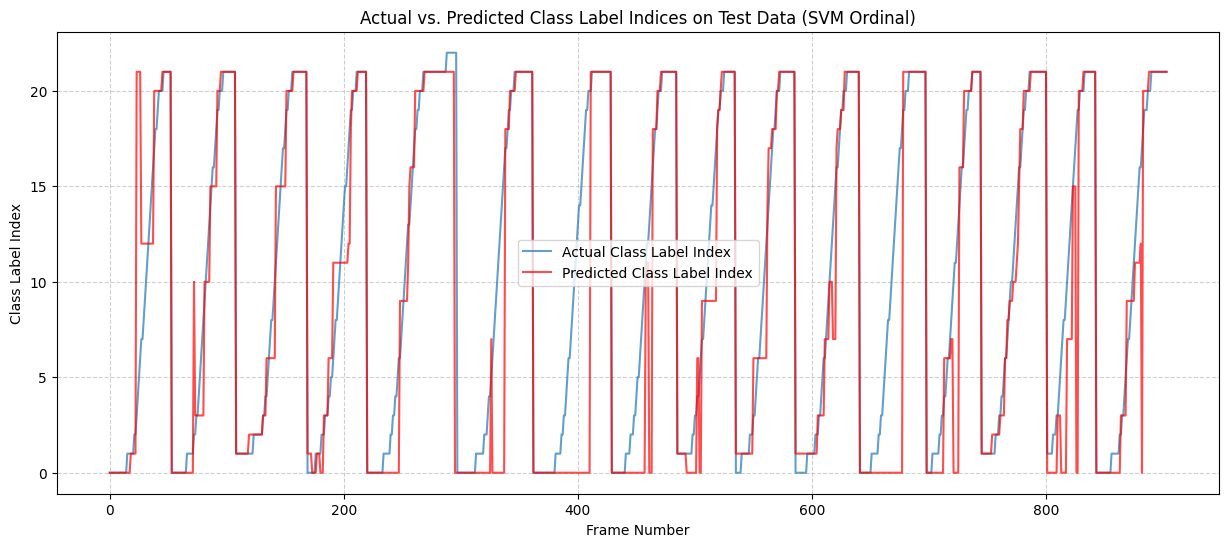

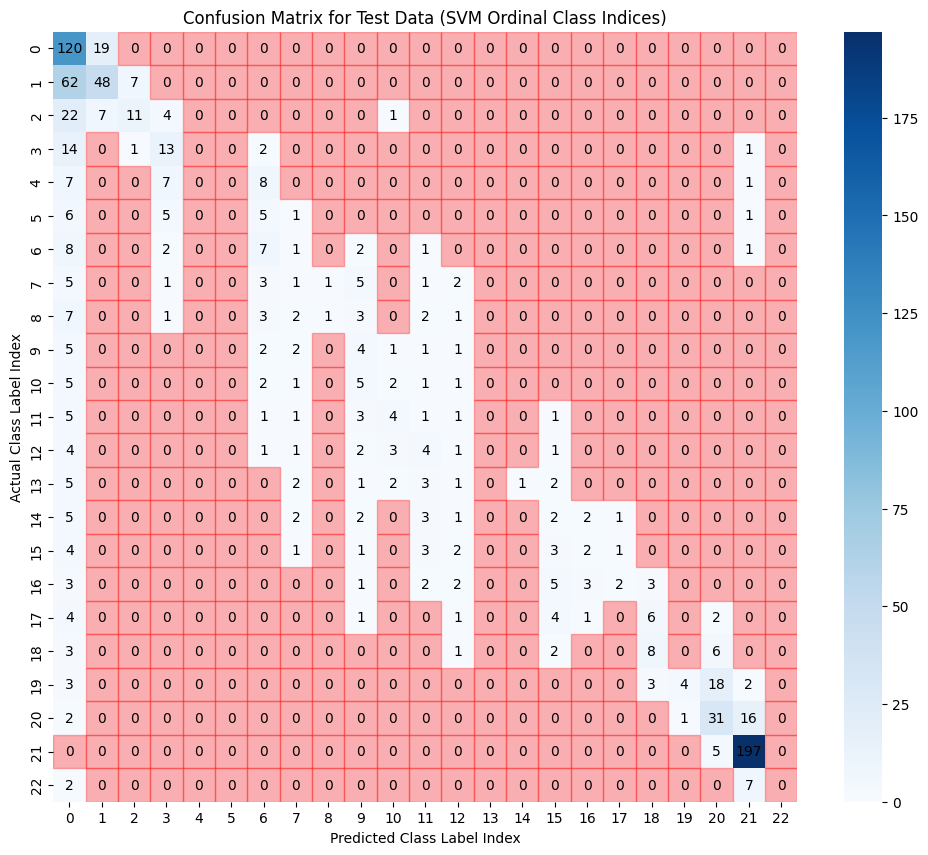


Mean Squared Error on Test Data (SVM Ordinal, using distance percentages): 0.0338


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, mean_squared_error
import numpy as np
import torch # Included as requested, though not used for core plotting/metrics

# The predicted_labels_int_ordinal and LRtesttgt_int (actual labels) are available from the previous cell.
# num_classes and int_to_label are available from the previous cell.


# Create a plot to visualize the actual vs. predicted class indices
plt.figure(figsize=(15, 6))
plt.plot(LRtesttgt_int, label='Actual Class Label Index', alpha=0.7)
plt.plot(predicted_labels_int_ordinal, label='Predicted Class Label Index', alpha=0.7, color='red')
plt.xlabel("Frame Number")
plt.ylabel("Class Label Index")
plt.title("Actual vs. Predicted Class Label Indices on Test Data (SVM Ordinal)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Compute the confusion matrix
cm_ordinal_svm = confusion_matrix(LRtesttgt_int, predicted_labels_int_ordinal)

# Get tick labels for the confusion matrix (using integer indices)
tick_labels = [f'{i}' for i in range(num_classes)]

# Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
ax = sns.heatmap(cm_ordinal_svm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=tick_labels, yticklabels=tick_labels,
            annot_kws={"color": "black", "weight": "normal"})

# Highlight cells with value 0 in red by drawing rectangles
for i in range(cm_ordinal_svm.shape[0]):
    for j in range(cm_ordinal_svm.shape[1]):
        if cm_ordinal_svm[i, j] == 0:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='red', alpha=0.3))

plt.xlabel("Predicted Class Label Index")
plt.ylabel("Actual Class Label Index")
plt.title("Confusion Matrix for Test Data (SVM Ordinal Class Indices)")
plt.show()

# Calculate Mean Squared Error using original distance percentage values
# Convert predicted and actual class indices back to original distance percentage values
predicted_distance_values_ordinal_svm = np.array([int_to_label[idx] for idx in predicted_labels_int_ordinal])
actual_distance_values_ordinal_svm = np.array([int_to_label[idx] for idx in LRtesttgt_int])

# Calculate MSE
test_mse_ordinal_svm = mean_squared_error(actual_distance_values_ordinal_svm, predicted_distance_values_ordinal_svm)

# Print the calculated Mean Squared Error after the confusion matrix
print(f"\nMean Squared Error on Test Data (SVM Ordinal, using distance percentages): {test_mse_ordinal_svm:.4f}")

In [13]:
import pandas as pd

# Collect the MSE values using the provided variable names
mse_values = {
    'Model Type': ['PyTorch Regression', 'PyTorch SLP One-Hot', 'PyTorch SLP Ordinal', 'scikit-learn SVM Ordinal'],
    'Mean Squared Error (Test)': [test_mse_predictor, test_mse_SLP_One_Hot, test_mse_SLP_Ordinal, test_mse_ordinal_svm]
}

# Create a pandas DataFrame
mse_df = pd.DataFrame(mse_values)

# Display the DataFrame
print("Mean Squared Error Comparison on Test Data:")
display(mse_df)

Mean Squared Error Comparison on Test Data:


,Model Type,Mean Squared Error (Test)
0,PyTorch Regression,0.028115
1,PyTorch SLP One-Hot,0.009124
2,PyTorch SLP Ordinal,0.008498
3,scikit-learn SVM Ordinal,0.033794
